<a href="https://colab.research.google.com/github/SolgrynTheGamer/Data-Analysis-Programming/blob/main/Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 98.7MB/s]


In [4]:
ls

drive/  sample_data/  videogamesales.zip


In [5]:
import zipfile

file_path = '/content/videogamesales.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')


df_sales = pd.read_csv('/content/drive/MyDrive/kaggle/vgsales.csv')

# 새 섹션

In [6]:
print(df_sales)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [7]:
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df_sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
print("checking if any null values are present\n", df_sales.isna().sum())

checking if any null values are present
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [11]:
len(df_sales)

16598

위는 비디오 게임 판매량 데이터셋을 불러오고 대략적인 값을 본 후에 결측값이 있는지 확인한 결과이다. 총 16598개의 데이터에서 Year는 271개, Publisher는 58개의 결측값이 있다.

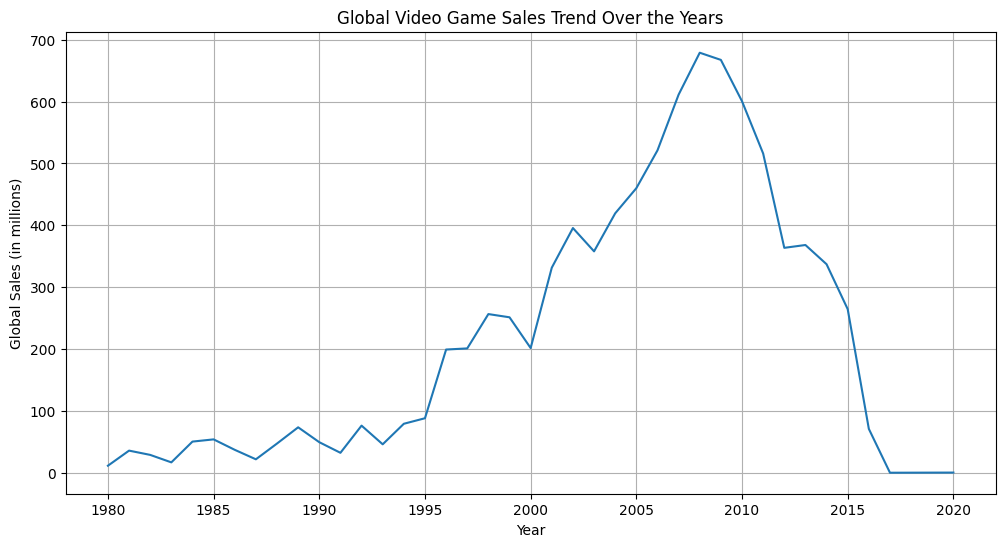

In [13]:
data_filtered = df_sales.dropna(subset=['Year'])

yearly_sales = data_filtered.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Global Video Game Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

위 그래프는 년도에 따른 전체 판매량의 추이를 나타낸 것이다. Year의 결측값은 그대로 제거했다.

1980년대부터 서서히 판매량이 증가하다가 그 이후로 급격히 늘어나면서 2000년대 중반에 최고점을 찍는 것을 볼 수 있다. 이때 최고점 달성은 2000년대에 들어 차세대 플랫폼과 기술 발달에 힘입어 게임 산업에 빠른 성장을 이루어 그 영향을 받은 것으로 보인다.

최고점 달성 이후로 판매량이 크게 떨어졌다. 이는 시장 포화도, 모바일 게임 시장의 발달, 혹은 소비자의 취향이 달라진 이유를 들 수 있다.

각 해마다 변동이 여러번 있는데, 경제적 상황과 모두의 큰 기대를 받는 게임의 출시 전, 혹은 게임 플랫폼의 인기도의 변화가 요인이다.

이에 따라 위 그래프는 역대 비디오 게임 산업의 성장과 변화를 보여주고 그 변화를 일으킨 기술과 시장 역학을 보여준다.

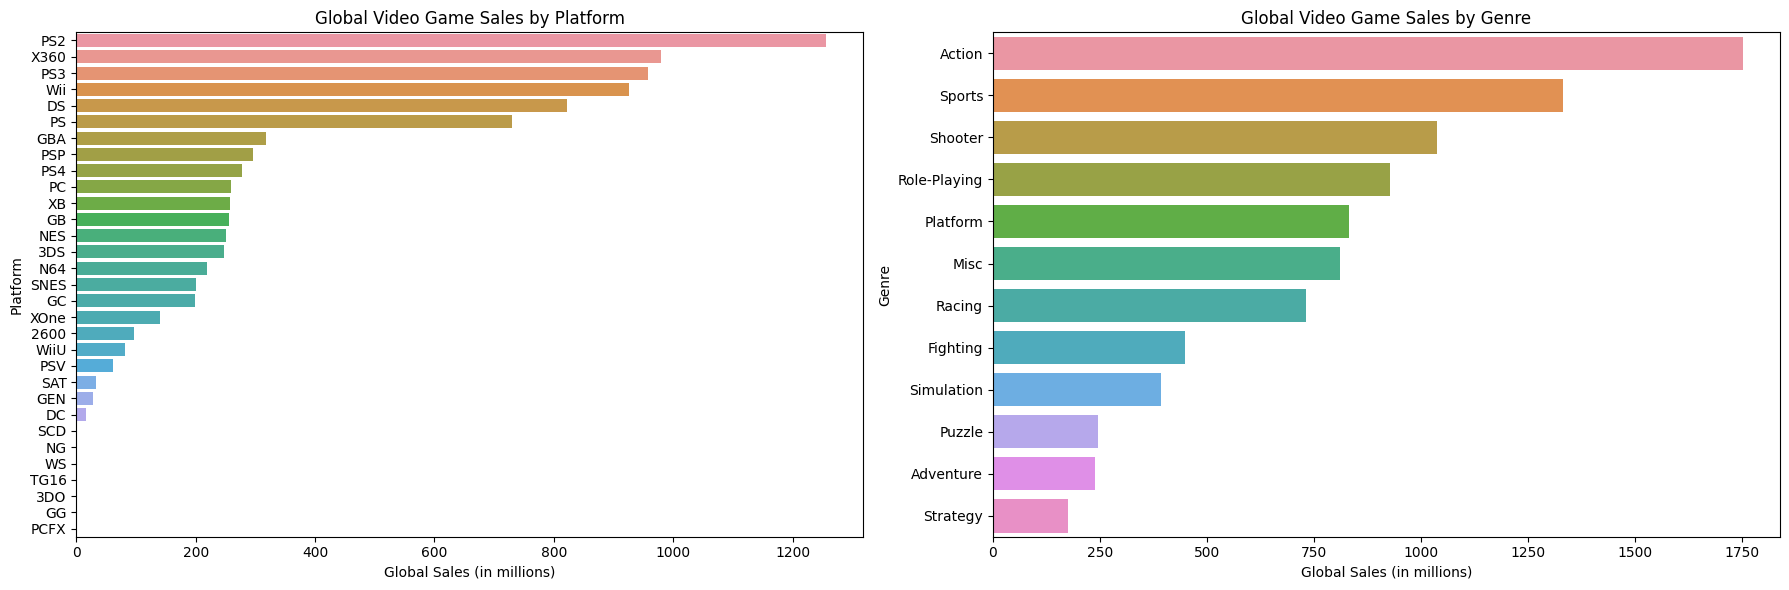

In [14]:
platform_sales = df_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

genre_sales = df_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=platform_sales.values, y=platform_sales.index, ax=ax[0])
ax[0].set_title('Global Video Game Sales by Platform')
ax[0].set_xlabel('Global Sales (in millions)')
ax[0].set_ylabel('Platform')

sns.barplot(x=genre_sales.values, y=genre_sales.index, ax=ax[1])
ax[1].set_title('Global Video Game Sales by Genre')
ax[1].set_xlabel('Global Sales (in millions)')
ax[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()

위의 두 막대 그래프는 전체 판매량을 각각 플랫폼, 장르를 기준 삼아 인기 순으로 분석한 것이다.

좌측의 표는 각 플랫폼을 기준으로 한 판매량을 보여준다. 플레이스테이션2 부터 플레이스테이션1까지는 당시 PC가 보급화되지 않았기 때문에 그 밑에 비해 상당한 격차를 보여주는 것 같다. 플레이스테이션4와 PC를 비교하면 플레이스테이션4가 근소하게 앞서는 것을 보면 콘솔 유저와 PC 유저층이 비슷하다는 것을 볼 수 있다. 다만 XBOX를 비롯한 각 콘솔을 즐기는 사람도 비슷하게 많다는 것을 보여준다.

우측의 표는 각 장르를 기준으로 한 판매량을 보여준다. 특히 액션 장르가 두드러지게 높은데 이는 소비자들이 액션 장르가 가지는 시원한 타격감과 빠른 페이스를 즐겨 함을 알 수 있다.

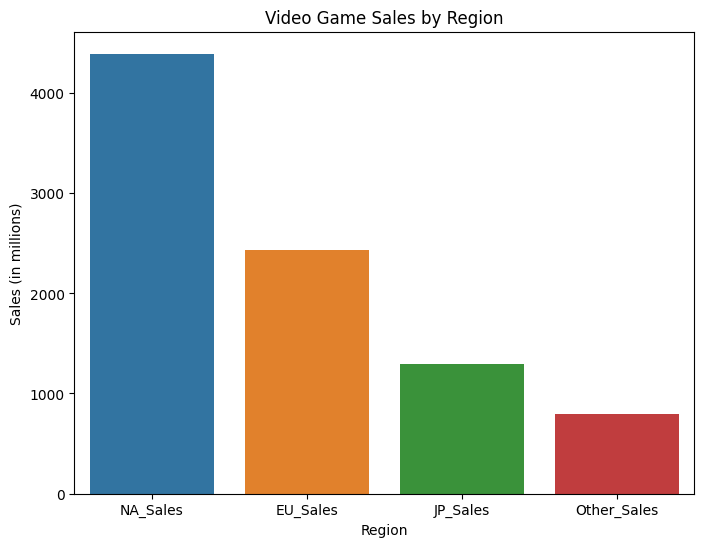

In [15]:
regional_sales = df_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()

위의 막대 그래프는 비디오 게임 판매량을 각 국가별로 통계낸 결과이다.

북아메리카에서는 가장 높은 판매량을 보여주고 있다. 이는 전국에서 소비자층이 가장 많고 비디오 게임 시장이 많이 발달하였으며 문화가 형성되어 있음을 보여준다.

유럽도 북아메리카에 비해서는 크지 않지만 그래도 판매량에 큰 역할을 한다.

일본은 그래프를 보면 별로 중요하지 않을 거라 판단할 수 있지만 여전히 상당히 중요하다. 일본만이 가지는 특수한 게임 문화와 일본에서 탄생한 유명한 게임들을 생각해보면 다른 국가와 비교해서도 높은 판매량을 가진다는 것은 게임 시장에 핵심적인 심장이라 할 수 있다.

기타 국가들의 그래프는 경제적인 이유와 게임 문화가 아직 덜 발달되어 있고 기술 부족의 원인을 들 수 있다.

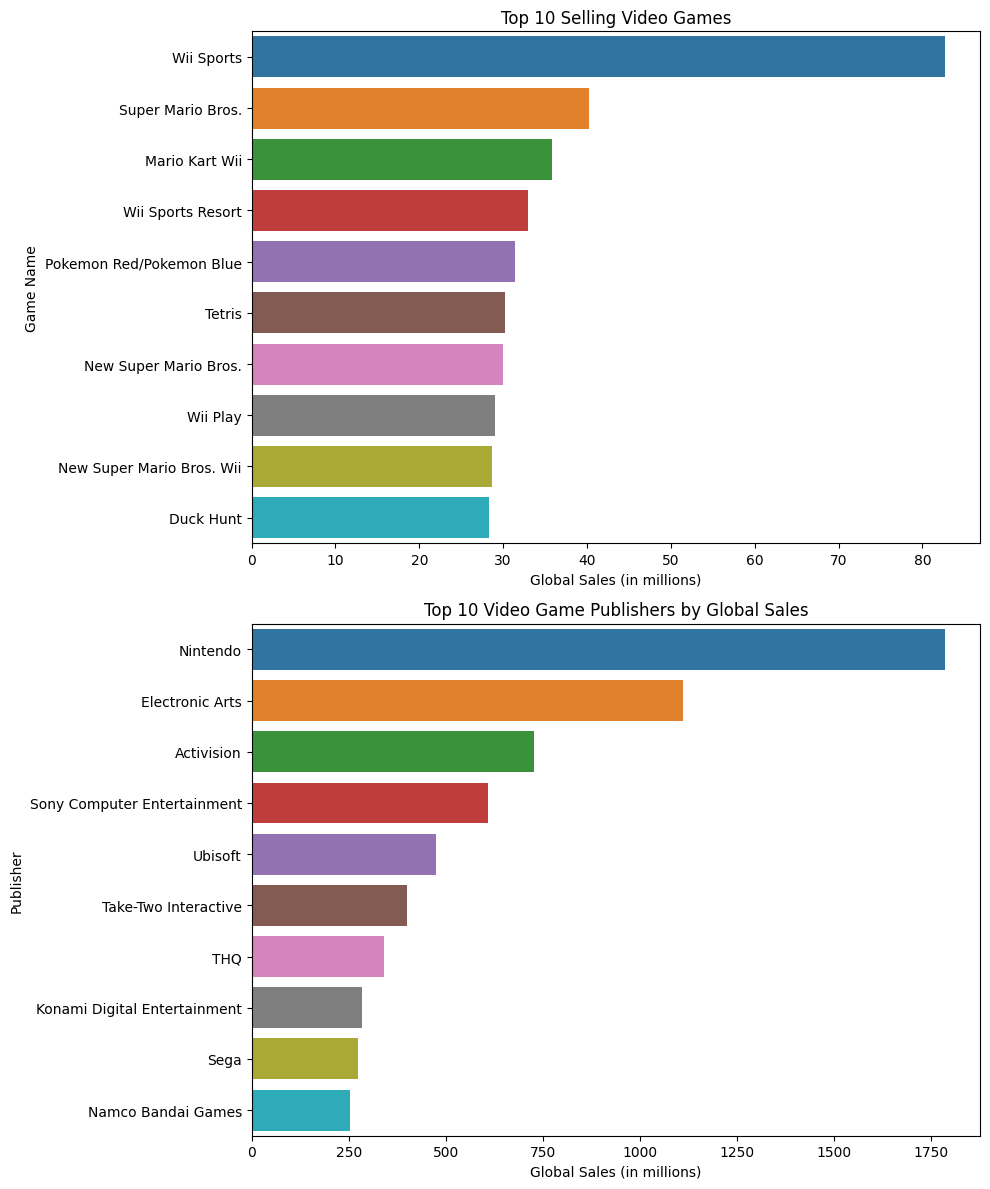

In [16]:
top_games = df_sales[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

top_publishers = df_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x='Global_Sales', y='Name', data=top_games, ax=ax[0])
ax[0].set_title('Top 10 Selling Video Games')
ax[0].set_xlabel('Global Sales (in millions)')
ax[0].set_ylabel('Game Name')

sns.barplot(x=top_publishers.values, y=top_publishers.index, ax=ax[1])
ax[1].set_title('Top 10 Video Game Publishers by Global Sales')
ax[1].set_xlabel('Global Sales (in millions)')
ax[1].set_ylabel('Publisher')

plt.tight_layout()
plt.show()

위의 표는 상위 10개의 최고 판매된 게임과 판매사를 나타낸 것이다.

상단의 표는 상위 10개의 최고 판매량 게임으로 대부분 Wii용 게임과 콘솔 게임이 많음을 볼 수 있다.

하단의 표는 상위 10개의 최고 판매량을 가진 판매사로 전의 Wii를 가진 닌텐도가 가장 높음을 볼 수 있다. 상위에 있는 판매사는 성공한 게임을 여럿 낸 회사로 이 영향력을 게임 시장에서 확인할 수 있다.

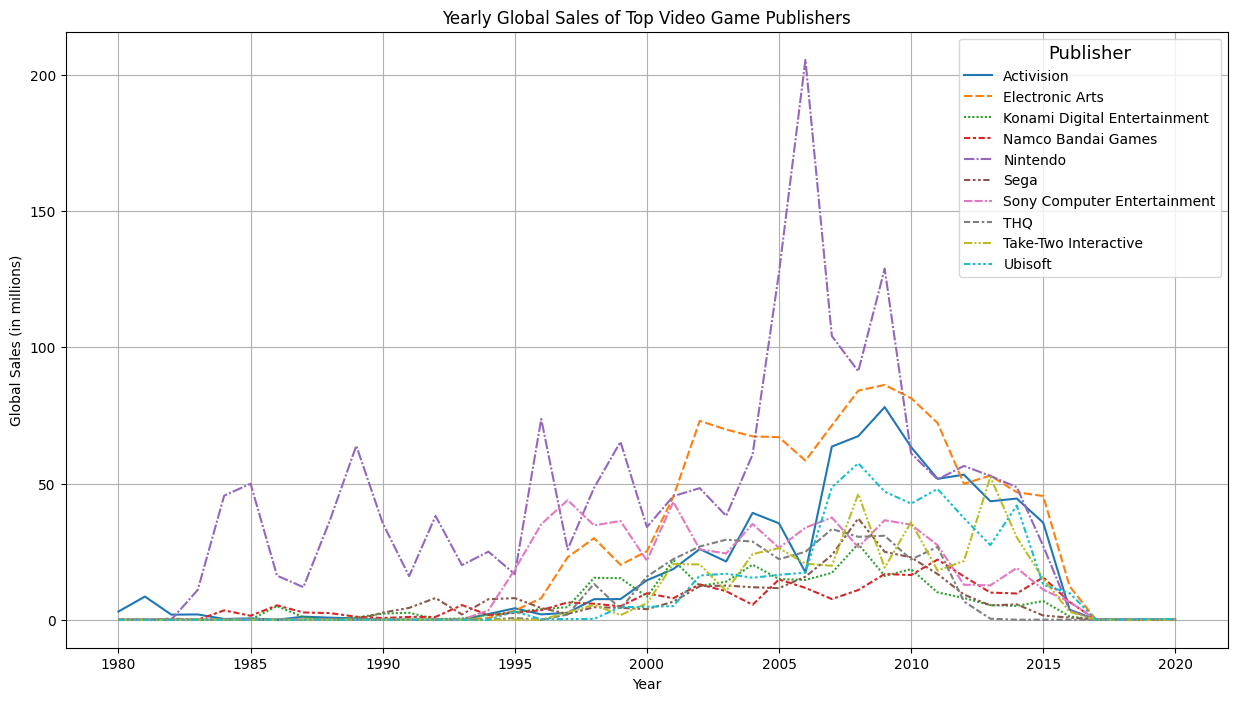

In [17]:
top_publishers_overall = df_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

top_publishers_data = df_sales[df_sales['Publisher'].isin(top_publishers_overall)]

yearly_publisher_sales = top_publishers_data.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_publisher_sales)
plt.title('Yearly Global Sales of Top Video Game Publishers')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Publisher', title_fontsize='13', fontsize='10')
plt.grid(True)
plt.show()

위 그래프는 시간별로 각 판매사의 판매량을 나타낸 것이다.

보통 성공적인 작품을 출시했을 때 판매량이 최고치를 찍는 모습이 보인다. 그 반대로 기대치에 미치지 못한 작품이 나온 경우에는 그래프가 하강세를 보인다.
전제적으로 그래프가 상승세를 보이는 것은 시장이 서서히 발달하고 있음을 알 수 있다.

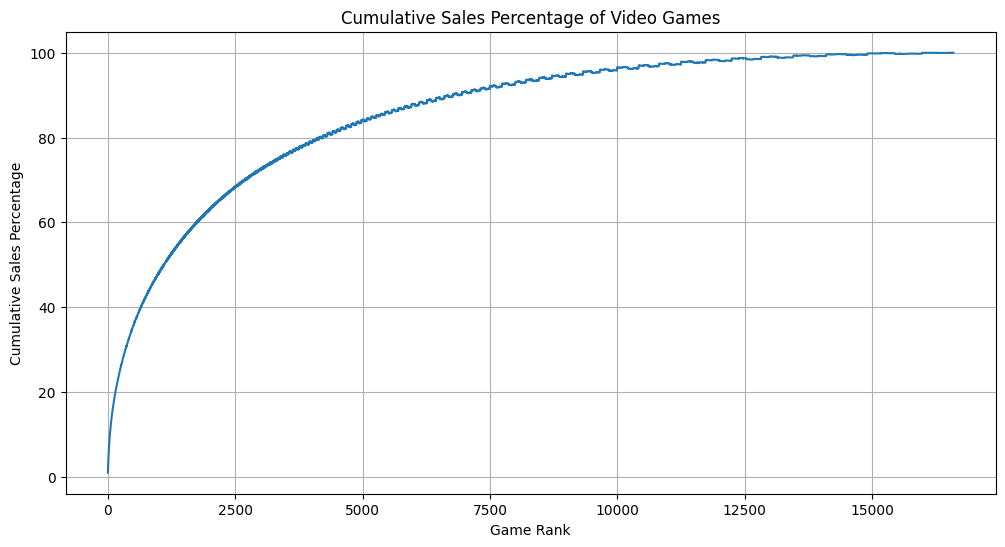

(                       Name  Global_Sales  Cumulative_Sales  \
 0                Wii Sports         82.74             82.74   
 1         Super Mario Bros.         40.24            122.98   
 2            Mario Kart Wii         35.82            158.80   
 3         Wii Sports Resort         33.00            191.80   
 4  Pokemon Red/Pokemon Blue         31.37            223.17   
 
    Cumulative_Sales_Percentage  
 0                     0.927533  
 1                     1.378632  
 2                     1.780181  
 3                     2.150118  
 4                     2.501782  ,
                                               Name  Global_Sales  \
 1085                               Madden NFL 2001          1.67   
 1086                           Fight Night Round 3          1.67   
 1097                                   Dying Light          1.66   
 1099  Street Fighter II': Special Champion Edition          1.66   
 1100                                           SSX          1.6

In [18]:
sorted_games = df_sales[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False)

sorted_games['Cumulative_Sales'] = sorted_games['Global_Sales'].cumsum()
total_sales = sorted_games['Global_Sales'].sum()
sorted_games['Cumulative_Sales_Percentage'] = (sorted_games['Cumulative_Sales'] / total_sales) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=sorted_games.index, y='Cumulative_Sales_Percentage', data=sorted_games)
plt.title('Cumulative Sales Percentage of Video Games')
plt.xlabel('Game Rank')
plt.ylabel('Cumulative Sales Percentage')
plt.grid(True)
plt.show()

sorted_games.head(), sorted_games.loc[sorted_games['Cumulative_Sales_Percentage'] <= 50].tail(), total_sales

판매량이 높은 순으로 전체 판매량에 얼마나 기여했는지를 분석한 그래프이다.
여기서 상위 5개 게임들이 전체 판매량의 2.5% 정도를 차지하는데 총 16000개를 넘어가는 큰 숫자에 비교하면 높은 비중이다. 그 이후로 로그 함수의 형태를 띄는 것은 판매량 분배에 하위 게임들은 낮은 비중을 차지함을 볼 수 있다. 상위 50%에 들어가려면 전체 데이터셋에서 상위 1100개를 고려해야 한다. 이는 판매량의 상당수가 성공한 작품에 몰려있고 그 외 상당수는 전체적으로 퍼져있음을 보여준다.

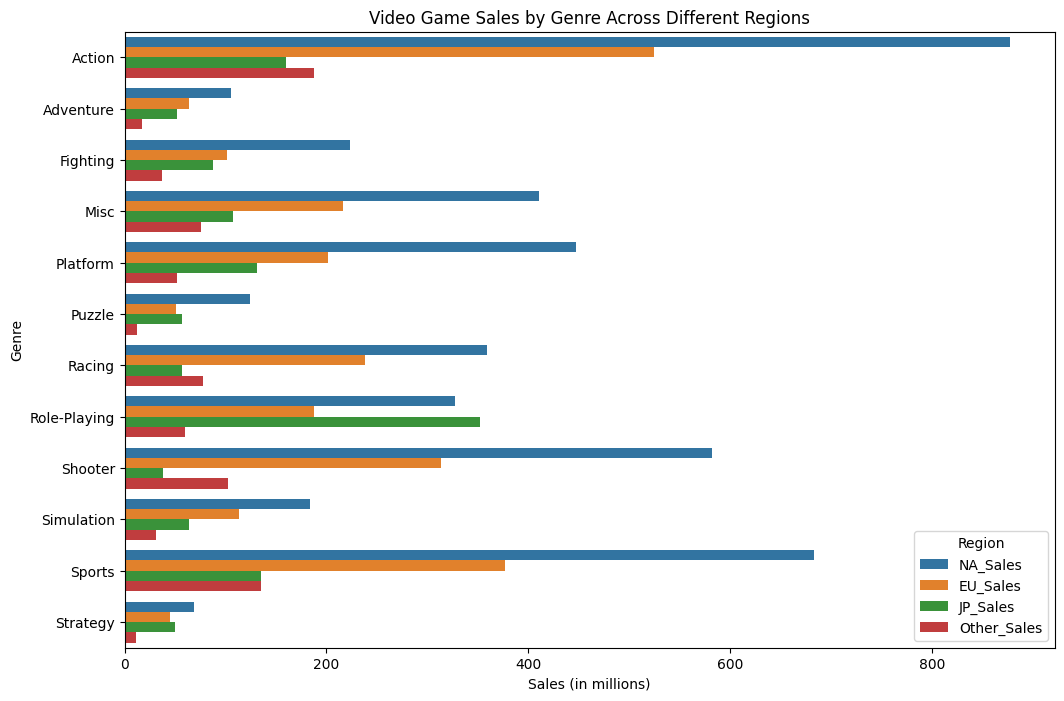

In [19]:
regional_genre_sales = df_sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

regional_genre_sales_melted = regional_genre_sales.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Genre', hue='Region', data=regional_genre_sales_melted)
plt.title('Video Game Sales by Genre Across Different Regions')
plt.xlabel('Sales (in millions)')
plt.ylabel('Genre')
plt.legend(title='Region')
plt.show()

위의 막대 그래프는 각각의 장르를 지역별로 구분하여 판매량을 분석한 자료이다.

그래프를 보면 북아메리카는 액션, 스포츠, 슈터에 큰 인기를 가지고 있고, 유럽도 마찬가지로 북아메리카와 비슷한 양상을 가지며 일본은 RPG가 두드러지게 큰 판매량을 가진다. 이는 일본은 다른 나라와는 차별점을 가지는 게임 문화가 형성됐음을 알 수 있다. 기타 국가는 북아메리카와 유럽과 비슷한 그래프를 가지고 있다. 전체적으로 보면 액션과 스포츠 장르가 큰 인기를 가지고 있다.

이러한 인기도 차이는 문화적인 선호도, 문화, 시장 형성도에 영향이 있다. 일본의 경우를 보면 스토리텔링과 판타지 요소가 많이 들어감을 볼 수 있다.

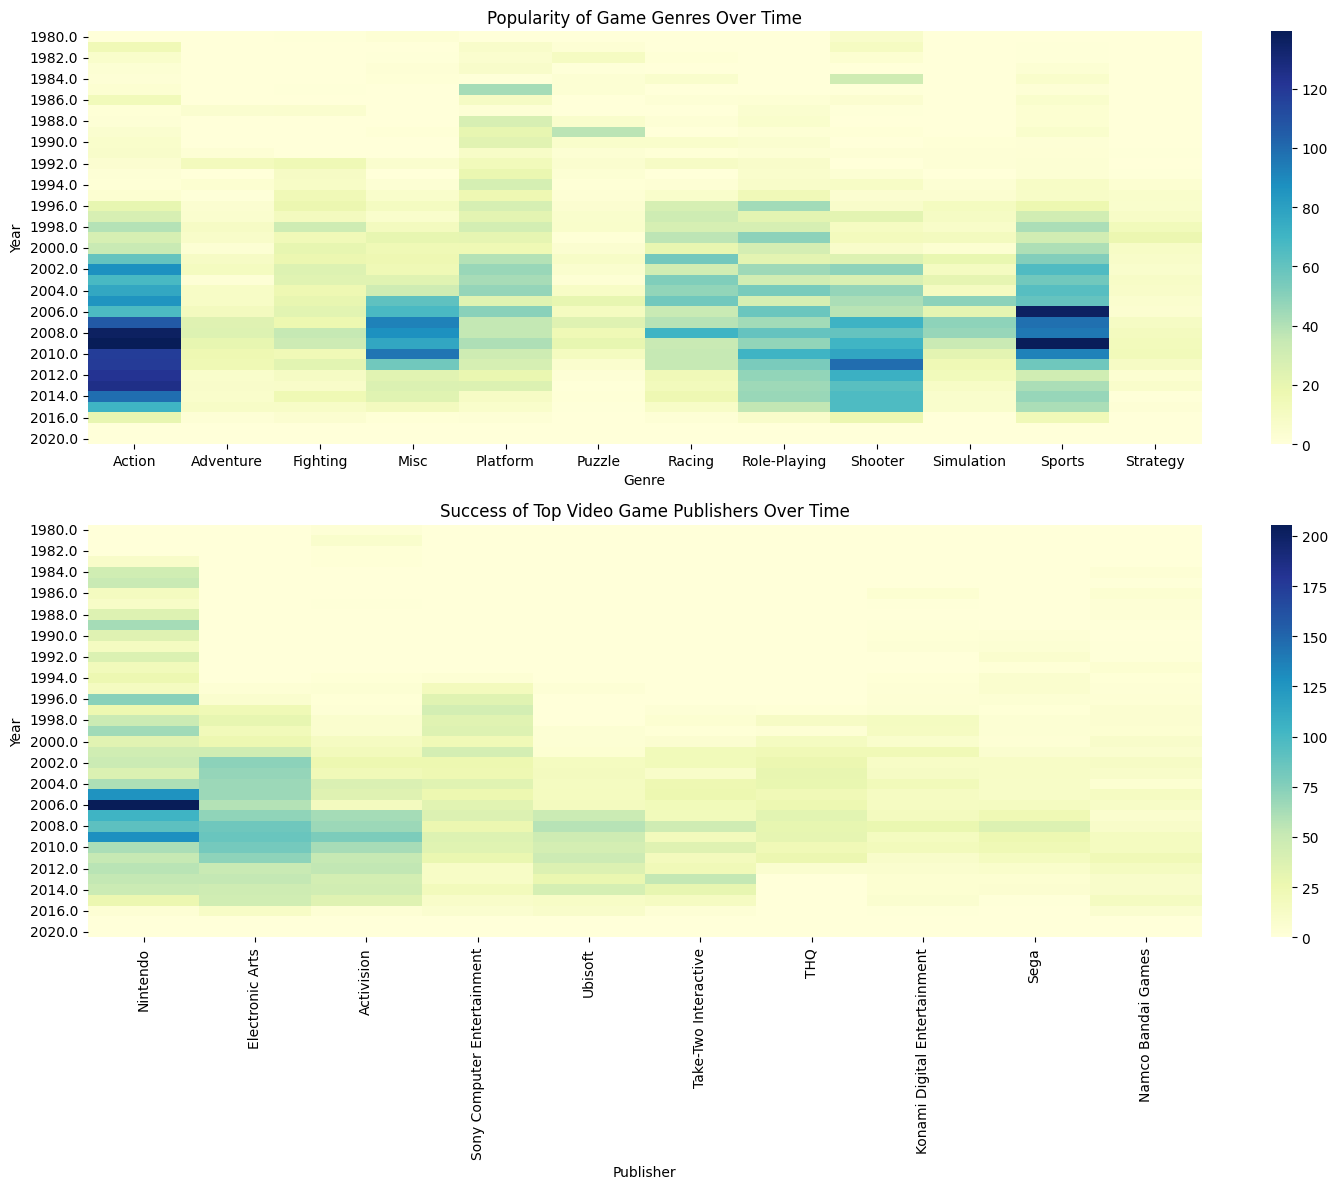

In [21]:
genre_yearly_sales = df_sales.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

publisher_yearly_sales = df_sales.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

top_publishers = df_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index
publisher_yearly_sales_top = publisher_yearly_sales[top_publishers]

fig, ax = plt.subplots(2, 1, figsize=(15, 12))

sns.heatmap(genre_yearly_sales, ax=ax[0], cmap="YlGnBu")
ax[0].set_title('Popularity of Game Genres Over Time')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Year')

sns.heatmap(publisher_yearly_sales_top, ax=ax[1], cmap="YlGnBu")
ax[1].set_title('Success of Top Video Game Publishers Over Time')
ax[1].set_xlabel('Publisher')
ax[1].set_ylabel('Year')

plt.tight_layout()
plt.show()

위의 히트맵은 다양한 게임 장르, 판매사의 발전을 시간순대로 보여준다. 어두운 색깔일수록 해당 년도에 높은 판매량을 가졌다는 의미이다.

액션, 스포츠, 슈터의 경우 시간이 지날수록 인기가 식지 않고 해마다 판매량을 증가함을 볼 수 있다. 판매량을 급격히 높아진 순간은 인기있는 게임의 출시나 소비자의 취향이 변해서 다른 장르를 시도했음의 이유를 들 수 있다.

닌텐도나 EA의 경우에는  여러 해동안 성공을 거뒀지만 다른 판매사의 경우에는 판매량이 요동침을 볼 수 있다. 이 경우 판매사의 성공은 인기 있는 메이저한 작품의 출시, 새로운 시장으로의 진출 노력 혹은 각종 판매 전략에 힘써야 얻을 수 있음을 알 수 있다.